# Manuel Prediction and Validation

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
import pandas as pd
print(pd.__version__)

0.20.3


## First Step: Load Data and disassemble for our purposes

In [31]:
# df = pd.read_csv('./insurance-customers-300.csv', sep=';')
df = pd.read_csv('./insurance-customers-300-2.csv', sep=';')

In [32]:
y=df['group']

In [33]:
X = df.as_matrix()

In [34]:
df.drop('group', axis='columns', inplace=True)

In [35]:
df.describe()

,max speed,age,thousand km per year
count,300.000000,300.000000,300.000000
mean,171.260000,44.803333,29.933333
std,18.773756,17.340713,15.409100
min,130.000000,18.000000,5.000000
25%,160.000000,32.000000,17.000000
50%,171.000000,42.000000,28.000000
75%,186.250000,53.000000,43.000000
max,208.000000,90.000000,74.000000


## Second Step: Split data and validate manual prediction

In [36]:
# ignore this, it is just technical code
# should come from a lib, consider it to appear magically 
# http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_print = ListedColormap(['#AA8888', '#004000', '#FFFFDD'])
cmap_bold = ListedColormap(['#AA4444', '#006000', '#AAAA00'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#FFFFDD'])
font_size=25

def meshGrid(x_data, y_data):
    h = 1  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True, fname=None):
    xx,yy = meshGrid(x_data, y_data)
    plt.figure(figsize=(20,10))

    if clf and mesh:
        Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
#     plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o', edgecolors='k')
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_print, s=200, marker='o', edgecolors='k')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)
    if fname:
        plt.savefig(fname)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [39]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((180, 4), (180,), (120, 4), (120,))

In [40]:
X_train_kmh_age = X_train[:, :2]
X_test_kmh_age = X_test[:, :2]
X_train_2_dim = X_train_kmh_age
X_test_2_dim = X_test_kmh_age

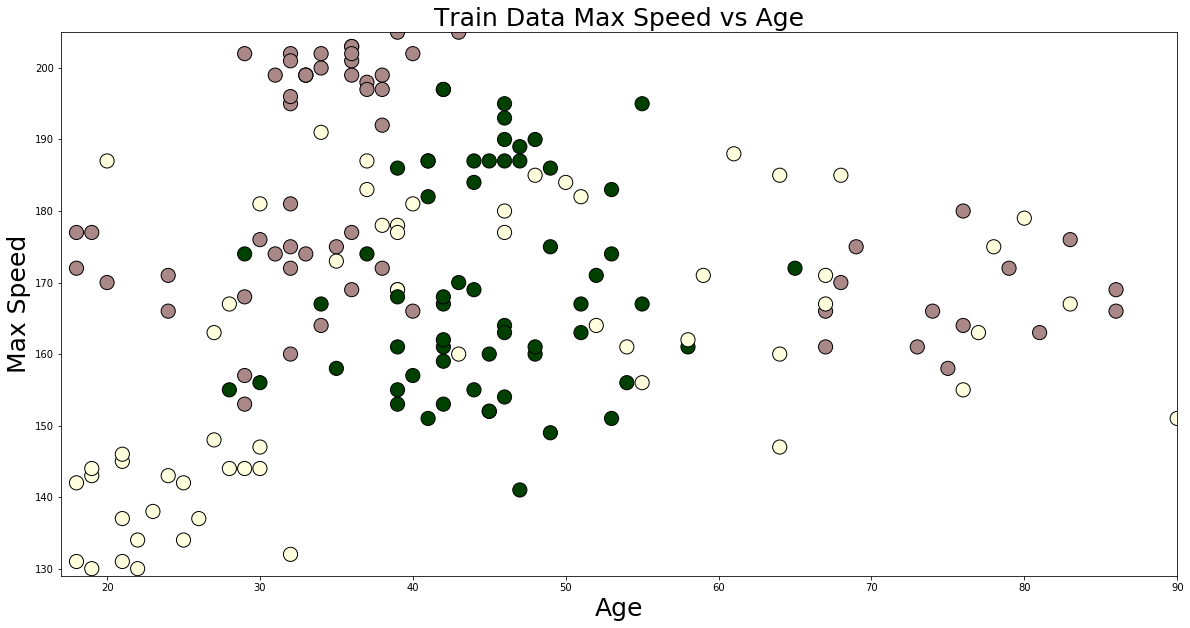

In [41]:
plotPrediction(None, X_train_2_dim[:, 1], X_train_2_dim[:, 0], 
               'Age', 'Max Speed', y_train, mesh=False,
                title="Train Data Max Speed vs Age", fname='train2.png')

## Exercise, Part I: Using pen and paper
### Separate the three groups of insurance customers visually 
* every part of the data needs a category
* draw as many lines and whatever shapes you want to separate the categories from each other
* mark each category by either putting R(ed), G(reen), or Y(ellow)
* have a look at this colored image above as it might not be easy to see the colors in the printed sheet 

**Important: Use a hard pen or pencil and apply some pressure when drawing**

## Third step: Validate your prediction using test data

## Exercise, Part II: Using pen and paper
### Validate your categories with test data 
* turn the page and look at the test data chart
* try to see the lines that have been printed through to this one
* redraw the lines with the pen for more clarity
* how well would your separation perform on this chart?

**The test data is the one that matters, as it tells you how well you generalized**

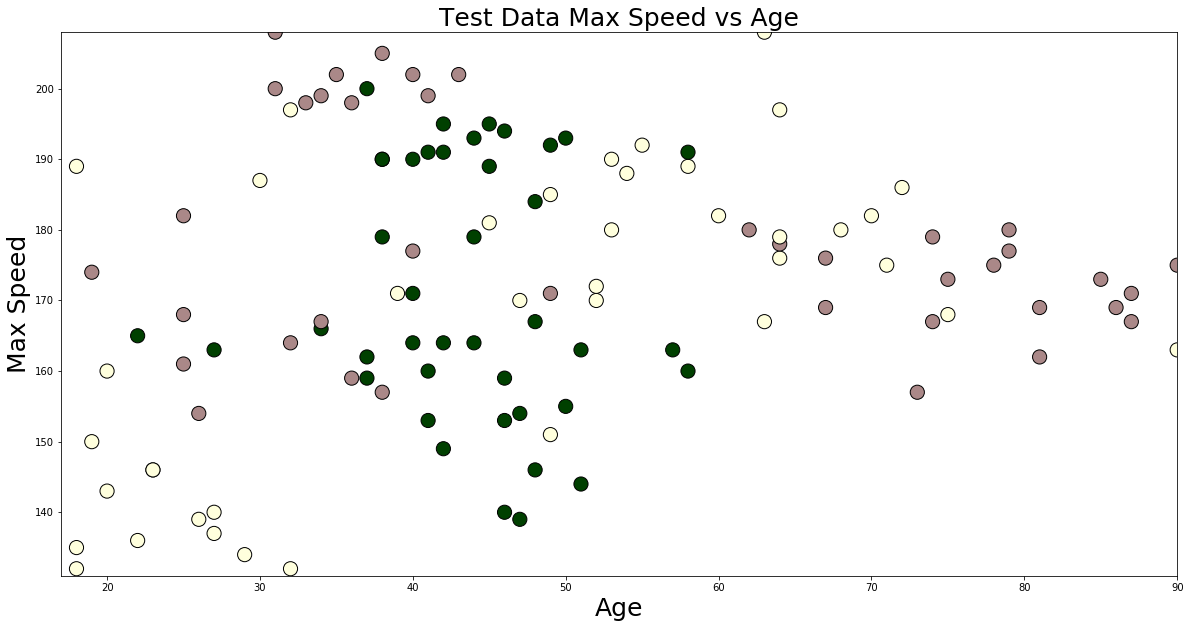

In [42]:
plotPrediction(None, X_test_2_dim[:, 1], X_test_2_dim[:, 0], 
               'Age', 'Max Speed', y_test, mesh=False,
                title="Test Data Max Speed vs Age", fname='test2.png')

### Effectively what you did most likely is called Overfitting - you match your samples too closely failing to generalize properly


## Exercise, Part III: Using pen and paper
### Repat the experiment with the new knowledge 
* try to generalize more properly
* be careful, the second experiment contains new data both for training and test